#### J034 Meghna Jayakar Lab 1 

28/7/24

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [276]:
df = pd.read_excel('./Bike Sales Dashboard.xlsx')
df

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Middle Age,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Middle Age,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Middle Age,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,Middle Age,No


In [277]:
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['ID', 'MartialStatus', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'HomeOwner', 'Cars', 'CommuteDistance', 'Region', 'Age',
       'AgeBrackets', 'PurchasedBike'],
      dtype='object')

In [278]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56360.000000,1.898000,1.442000,44.163000
std,5347.333948,31085.635215,1.628572,1.125123,11.364488
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               1000 non-null   int64 
 1   MartialStatus    1000 non-null   object
 2   Gender           1000 non-null   object
 3   Income           1000 non-null   int64 
 4   Children         1000 non-null   int64 
 5   Education        1000 non-null   object
 6   Occupation       1000 non-null   object
 7   HomeOwner        1000 non-null   object
 8   Cars             1000 non-null   int64 
 9   CommuteDistance  1000 non-null   object
 10  Region           1000 non-null   object
 11  Age              1000 non-null   int64 
 12  AgeBrackets      1000 non-null   object
 13  PurchasedBike    1000 non-null   object
dtypes: int64(5), object(9)
memory usage: 109.5+ KB


In [280]:
df.isna().sum()

ID                 0
MartialStatus      0
Gender             0
Income             0
Children           0
Education          0
Occupation         0
HomeOwner          0
Cars               0
CommuteDistance    0
Region             0
Age                0
AgeBrackets        0
PurchasedBike      0
dtype: int64

In [281]:
df.nunique()

ID                 1000
MartialStatus         2
Gender                2
Income               16
Children              6
Education             5
Occupation            5
HomeOwner             2
Cars                  5
CommuteDistance       5
Region                3
Age                  53
AgeBrackets           3
PurchasedBike         2
dtype: int64

In [282]:
df.drop(['ID'], axis = 1, inplace = True)
df

,MartialStatus,Gender,Income,Children,Education,Occupation,HomeOwner,Cars,CommuteDistance,Region,Age,AgeBrackets,PurchasedBike
0,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Middle Age,Yes
996,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Middle Age,Yes
997,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Middle Age,Yes
998,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,Middle Age,No


C:\Users\Meghna\AppData\Local\Temp\ipykernel_5884\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

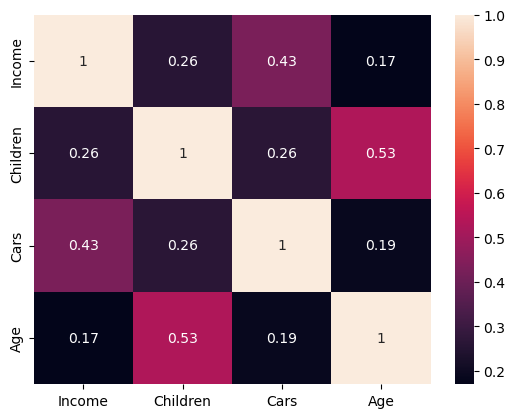

In [283]:
sns.heatmap(df.corr(), annot = True)

In [284]:
df.columns

Index(['MartialStatus', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'HomeOwner', 'Cars', 'CommuteDistance', 'Region', 'Age',
       'AgeBrackets', 'PurchasedBike'],
      dtype='object')

In [285]:
df.head(2)

,MartialStatus,Gender,Income,Children,Education,Occupation,HomeOwner,Cars,CommuteDistance,Region,Age,AgeBrackets,PurchasedBike
0,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No


#### Preprocessing

In [286]:
married = {'Single': 0, 'Married': 1}
df['MartialStatus'] = df['MartialStatus'].map(married)

In [287]:
gender = {'Female': 0, 'Male': 1}
df['Gender'] = df['Gender'].map(gender)

In [288]:
df = pd.get_dummies(df, columns = ['Occupation', 'Region'])

In [289]:
education = {'Partial High School': 0, 'High School': 1, 'Partial College': 2, 'Bachelors': 3, 'Graduate Degree': 4}
df['Education'] = df['Education'].map(education)

In [290]:
home = {'Yes': 1, 'No': 0}
df['HomeOwner'] = df['HomeOwner'].map(home)

In [291]:
age_categories = {'Adolescent': 0, 'Middle Age': 1, 'Old': 3}
df['AgeBrackets'] = df['AgeBrackets'].map(age_categories)

In [292]:
distance = {'0-1 Miles': 0, '1-2 Miles': 1, '2-5 Miles': 2, '5-10 Miles': 3, 'More than 10 Miles': 4}
df['CommuteDistance'] = df['CommuteDistance'].map(distance)

In [293]:
bike = {'Yes': 1, 'No': 0}
df['PurchasedBike'] = df['PurchasedBike'].map(bike)

In [294]:
df.head()

,MartialStatus,Gender,Income,Children,Education,HomeOwner,Cars,CommuteDistance,Age,AgeBrackets,PurchasedBike,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Region_Europe,Region_North America,Region_Pacific
0,1,0,40000,1,3,1,0,0,42,1,0,0,0,0,0,1,1,0,0
1,1,1,30000,3,2,1,1,0,43,1,0,1,0,0,0,0,1,0,0
2,1,1,80000,5,2,0,2,2,60,3,0,0,0,0,1,0,1,0,0
3,0,1,70000,0,3,1,1,3,41,1,1,0,0,0,1,0,0,0,1
4,0,1,30000,0,3,0,0,0,36,1,1,1,0,0,0,0,1,0,0


#### Splitting in train and test sets

In [295]:
x = df.drop(['PurchasedBike'], axis = 1)
y = df['PurchasedBike']

In [296]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [297]:
for _ in [xtrain, xtest, ytrain, ytest]:
    print(_.shape)

(800, 18)
(200, 18)
(800,)
(200,)


#### Scaling 

In [298]:
scaler = StandardScaler()
cols = ['Income', 'Age']

for col in cols:
    xtrain[col] = scaler.fit_transform(np.array(xtrain[col]).reshape(-1, 1))
    xtest[col] = scaler.fit_transform(np.array(xtest[col]).reshape(-1, 1))

#### Model Creation

In [299]:
model = Sequential([
    Dense(units = 64, input_shape = (18, ), activation = 'relu'), 
    Dense(units = 32, activation = 'relu'),
    Dense(units = 16, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
])

In [300]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                1216      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3841 (15.00 KB)
Trainable params: 3841 (15.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [301]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [302]:
history = model.fit(xtrain, ytrain, epochs = 12, batch_size = 32)

Epoch 1/12
25/25 [==============================] - 1s 3ms/step - loss: 0.7316 - accuracy: 0.5025
Epoch 2/12
25/25 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.6112
Epoch 3/12
25/25 [==============================] - 0s 3ms/step - loss: 0.6474 - accuracy: 0.6300
Epoch 4/12
25/25 [==============================] - 0s 3ms/step - loss: 0.6364 - accuracy: 0.6600
Epoch 5/12
25/25 [==============================] - 0s 3ms/step - loss: 0.6256 - accuracy: 0.6637
Epoch 6/12
25/25 [==============================] - 0s 3ms/step - loss: 0.6145 - accuracy: 0.6700
Epoch 7/12
25/25 [==============================] - 0s 3ms/step - loss: 0.6064 - accuracy: 0.6850
Epoch 8/12
25/25 [==============================] - 0s 3ms/step - loss: 0.5956 - accuracy: 0.6938
Epoch 9/12
25/25 [==============================] - 0s 4ms/step - loss: 0.5876 - accuracy: 0.6900
Epoch 10/12
25/25 [==============================] - 0s 3ms/step - loss: 0.5750 - accuracy: 0.6975
Epoch 11/12
25/25 [

#### Model Evaluation

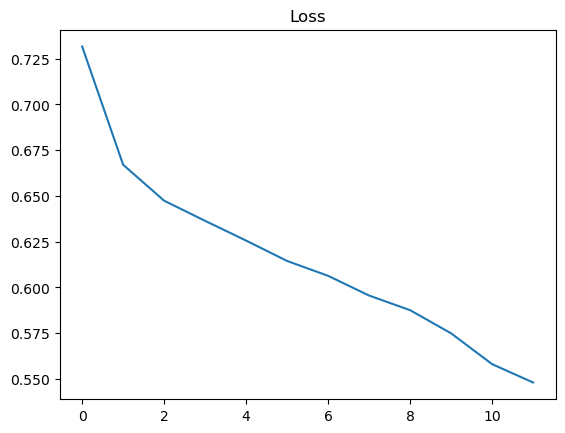

In [303]:
plt.plot(history.history['loss'], label = 'train')
plt.title('Loss')
plt.show()

In [304]:
_, acc = model.evaluate(xtest, ytest)
print('Accuracy: %.2f' % (acc * 100), '%')

7/7 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.6400
Accuracy: 64.00 %


#### Prediction

In [305]:
yprobs = model.predict(xtest)
yprobs

7/7 [==============================] - 0s 2ms/step


array([[0.3149829 ],
       [0.27770466],
       [0.2279032 ],
       [0.6840873 ],
       [0.24636821],
       [0.15794352],
       [0.18657734],
       [0.31443062],
       [0.26236048],
       [0.19367869],
       [0.4648543 ],
       [0.21416372],
       [0.44755757],
       [0.47190294],
       [0.15912603],
       [0.35854763],
       [0.43331087],
       [0.6728775 ],
       [0.1329748 ],
       [0.43481532],
       [0.29276106],
       [0.8213233 ],
       [0.39719242],
       [0.65010655],
       [0.5374509 ],
       [0.22733264],
       [0.7517264 ],
       [0.21185294],
       [0.8483763 ],
       [0.28349006],
       [0.57032955],
       [0.3588469 ],
       [0.25066522],
       [0.34690848],
       [0.45917204],
       [0.93675303],
       [0.15236834],
       [0.82341623],
       [0.56604886],
       [0.72693616],
       [0.53381544],
       [0.5563879 ],
       [0.27667227],
       [0.43991092],
       [0.20579642],
       [0.33444044],
       [0.801759  ],
       [0.393

In [306]:
ypreds = (yprobs > 0.5).astype(int)
ypreds

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
    

<Axes: >

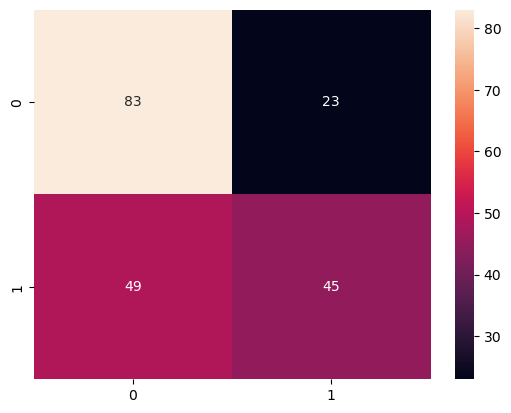

In [307]:
sns.heatmap(confusion_matrix(ytest, ypreds), annot = True)

In [308]:
print(classification_report(ytest, ypreds))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       106
           1       0.66      0.48      0.56        94

    accuracy                           0.64       200
   macro avg       0.65      0.63      0.63       200
weighted avg       0.64      0.64      0.63       200

